### Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#imports
import scipy.io
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import obspy
import pywt
import pywt.data

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

### Load the trimmed data 

In [3]:
path = "/Users/ecem/Desktop/phonocardiogram/data/PV/present"
waves = np.load(path + "/present_PV_waves_10sec.npy", allow_pickle= True)

In [4]:
waves.shape

(1198, 40000)

## Let's look at wavelet decomposition for a signal piece

#### how our decomposition filter values look like

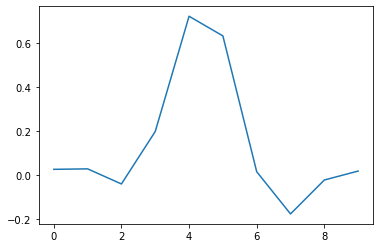

In [5]:
w = pywt.Wavelet('sym5')
plt.plot(w.dec_lo)
coeffs = pywt.wavedec(waves[0], w, level=6)

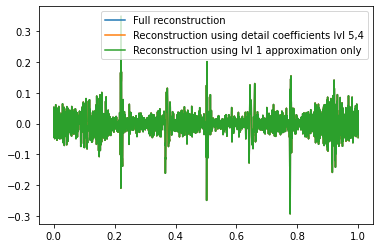

In [6]:
def reconstruction_plot(yyy, **kwargs):
    """Plot signal vector on x [0,1] independently of amount of values it contains."""
    plt.plot(np.linspace(0, 1, len(yyy)), yyy, **kwargs)

reconstruction_plot(pywt.waverec(coeffs, w)) # full reconstruction 
reconstruction_plot(pywt.waverec(coeffs[:-1] + [None] * 1, w)) # leaving out detail coefficients up to lvl 5
reconstruction_plot(pywt.waverec(coeffs[:-2] + [None] * 2, w)) # leaving out detail coefficients up to lvl 4
#reconstruction_plot(pywt.waverec(coeffs[:-3] + [None] * 3, w)) # leaving out detail coefficients up to lvl 3
#reconstruction_plot(pywt.waverec(coeffs[:-4] + [None] * 4, w)) # leaving out detail coefficients up to lvl 2
#reconstruction_plot(pywt.waverec(coeffs[:-5] + [None] * 5, w)) # leaving out detail coefficients up to lvl 1
#reconstruction_plot(pywt.waverec(coeffs[:-6] + [None] * 6, w)) # leaving out all detail coefficients = reconstruction using lvl1 approximation only
plt.legend(['Full reconstruction', 'Reconstruction using detail coefficients lvl 5,4', 'Reconstruction using lvl 1 approximation only'])

Amplitude of the coefficient corresponds to amplitude with which the wavelet occurs in the signal (y axis), and position of the coefficient corresponds to the time (x axis). 

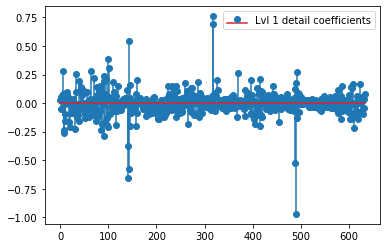

In [7]:
plt.stem(coeffs[1]); plt.legend(['Lvl 1 detail coefficients'])

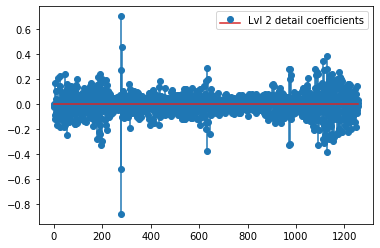

In [8]:
plt.stem(coeffs[2]); plt.legend(['Lvl 2 detail coefficients'])


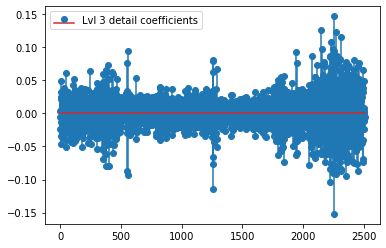

In [9]:
plt.stem(coeffs[3]); plt.legend(['Lvl 3 detail coefficients'])


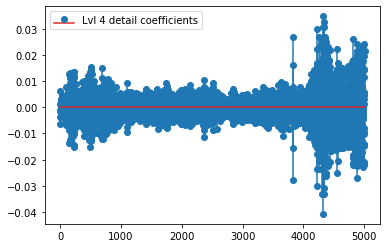

In [10]:
plt.stem(coeffs[4]); plt.legend(['Lvl 4 detail coefficients'])


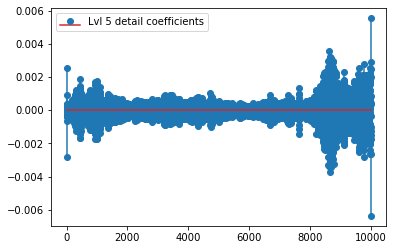

In [11]:
plt.stem(coeffs[5]); plt.legend(['Lvl 5 detail coefficients'])


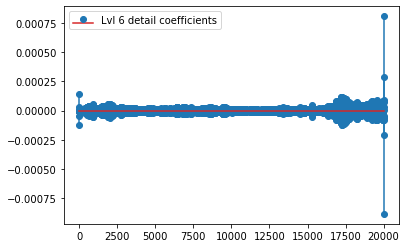

In [12]:
plt.stem(coeffs[6]); plt.legend(['Lvl 6 detail coefficients'])

In [13]:
# Reconstruction of signal using just lvl1 approximation
approx_lvl1 = pywt.waverec(coeffs[:-6] + [None] * 6, w)
# interpolate to original amount of samples (necessary due to numeric solution of transformation not yielding same amount of values)
approx_lvl1_interp = np.interp(x=np.arange(0, len(waves[0])), xp=np.linspace(0, 525, len(approx_lvl1)), fp=approx_lvl1)
x_without_lvl1approx = waves[0] - approx_lvl1_interp

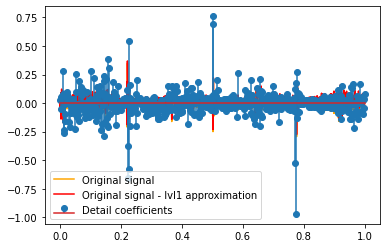

In [14]:
def reconstruction_stem(yyy, **kwargs):
    """Plot coefficient vector on x [0,1] independently of amount of values it contains."""
    plt.stem(np.linspace(0, 1, len(yyy)), yyy, **kwargs)

reconstruction_plot(waves[0], color='orange')
reconstruction_plot(x_without_lvl1approx, color='red')
reconstruction_stem(coeffs[1])
plt.legend(['Original signal', 'Original signal - lvl1 approximation', 'Detail coefficients'])

In [15]:
import pandas as pd

In [16]:
type(pywt.wavedec(waves[0], w, level=6))

list

In [17]:
coef = []
for i in range(len(waves)):
    coef.append(pywt.wavedec(waves[i], w, level=6))

In [18]:
for i in range(7):
    print(coef[0][i].shape)

(633,)
(633,)
(1258,)
(2508,)
(5007,)
(10006,)
(20004,)


In [19]:
coef[0]

[array([-1.10061944e-01, -1.45277604e-01, -1.33987322e-01, -5.39255403e-02,
         6.43106401e-02, -5.88657195e-03,  1.18477680e-01, -3.57108936e-02,
         2.89275474e-03,  5.42817637e-02,  1.59862041e-02, -8.47198255e-03,
         5.06154485e-02, -5.62844276e-02,  1.02539659e-01, -1.04075156e-01,
         3.10744327e-02,  1.60235483e-02,  1.85599402e-02,  3.93032432e-02,
         4.24011275e-02,  6.37456030e-03, -3.28093208e-02, -6.23676963e-02,
         1.52370166e-02, -7.00195879e-02,  2.01694779e-02,  3.96067370e-03,
         4.24631918e-03, -1.56704392e-02, -1.63610857e-02, -2.20814999e-02,
        -8.20908025e-02,  1.44050382e-02, -1.86534710e-02,  1.29181324e-02,
         1.75273418e-03,  1.96985295e-03,  3.53791309e-03,  2.99141575e-02,
         8.40101019e-02, -8.03432465e-02,  1.34021565e-02, -1.59896575e-02,
        -9.62356292e-03,  3.15844230e-02,  7.34647587e-02, -1.67974904e-02,
         3.74075584e-02, -5.40404730e-02, -3.07120346e-02, -2.73323730e-02,
        -1.2

In [20]:
coef[1]

[array([-2.54560709e-01, -2.83766866e-01, -2.61804014e-01, -1.61471441e-01,
         7.71527961e-02, -5.90297580e-03, -1.10454997e-02, -4.29101139e-02,
         1.00542434e-01,  3.66458558e-02, -5.15152514e-02, -2.56413519e-02,
        -2.50787893e-03,  3.23745199e-02,  5.73643446e-02, -5.79226129e-02,
        -4.29047924e-03, -1.83802079e-02, -2.90920120e-02,  7.79653788e-02,
        -2.82778367e-02,  4.46496718e-02,  3.07095852e-02,  9.71091539e-02,
         1.62482001e-02,  1.67672392e-02,  4.19426262e-02, -4.86433022e-02,
        -9.35960189e-03, -6.91477582e-02, -2.76064903e-01, -3.64837706e-01,
         1.94479041e-02,  8.76629353e-01, -2.65123963e-01, -3.19732457e-01,
         7.24517107e-02,  2.84192134e-02,  5.78601584e-02,  1.69726029e-01,
         1.16360001e-02, -1.16666339e-01, -6.76086321e-02, -8.87879953e-02,
         8.17687362e-02,  6.43157661e-02,  3.21099490e-01, -3.75612862e-02,
        -6.01450093e-02, -1.47383497e-03, -1.09690148e-02, -9.23179090e-04,
         2.8

### Level by level

In [21]:
def level_coef_extractor_3d(array, lvl = 0):
    array =np.array(array)
    
    lenn = array[0][lvl].shape[0] #48
    coef = np.ones(shape = (array.shape[0],lenn)) #2392,48
    
    for i in range(array.shape[0]):
        coef[i,:] = array[i][lvl]
        
    return coef

In [22]:
def saver(array = 0, lvl = 0, dir_path = None, name = 'blank'):
    coefs = level_coef_extractor_3d(array, lvl)
    np.save(dir_path + "/"+ str(name) + "_lvl_"  + str(lvl), coefs, allow_pickle = True)
    del coefs

In [23]:
for i in range(7):
    saver(coef, i, path, 'present_PV_wavelet_coef')


In [24]:
waves_ = np.load(path+ "/present_PV_wavelet_coef_lvl_0.npy",  allow_pickle = True)

In [25]:
waves.shape

(1198, 40000)

In [26]:
waves[0]

array([-0.0180991 , -0.01697315, -0.01519151, ..., -0.04074452,
       -0.04412403, -0.0444742 ], dtype=float32)

In [27]:
waves[10]

array([-0.01082504, -0.01130284, -0.01223935, ..., -0.01019376,
       -0.00684496,  0.        ], dtype=float32)